<img style="float: right;" src=https://nbviewer.jupyter.org/github/marianux/jupytest/blob/master/logo_UTN.svg width="200">

###     Teoría de Circuitos II  

#     Problema desafío

Se pide diseñar un filtro pasabajo que satisfaga la siguiente plantilla:

- fp=500 Hz
- fs=1500 Hz
- αmax=1 dB
- αmin=18 dB

a) Determine si el siguiente diseño puede realizarse con una sola sección de segundo orden cuya respuesta de módulo es de máxima planicidad.

Partiendo de la ecuación del módulo del cuadrado de la transferencia para un filtro de máxima planicidad:

$$
|H(ω)|^{2} = \frac{1}{1+\epsilon^{2}\omega^{2n}}
$$

Se normalizan las frecuencias angulares tomando la siguiente norma:

$$
\omega_{p} = 2 \pi 500Hz \Rightarrow \Omega_{p} = 1
$$

Las frecuencias normalizadas son:

$$
\Omega_{p} = 1 \\\Omega_{s} = 3
$$

Se calcula el valor de epsilon al cuadrado: 

$$
\epsilon^{2} = 10^{0,1.\alpha_{max}}-1
$$

In [1]:
alpha_max = 1

eps = 10 ** (0.1 * alpha_max) - 1
eps = round(eps, 5)

eps

0.25893

Se calcula el orden del filtro:

$$
n = \frac{log(\frac{10^{0,1.\alpha_{min}}-1}{\epsilon^{2}})}{2log(\Omega_{s})}
$$

In [2]:
import math

alpha_min = 18
ws = 3

num = math.log((10 ** (0.1 * alpha_min) - 1) / (eps), 10)
den = 2 * math.log(ws, 10)
order = math.ceil(num / den)

order

3

En conclusión, **no es posible implementar el filtro con una sola sección de segundo orden cuya respuesta de módulo sea de máxima planicidad** debido a los parámetros de plantilla que se deben satisfacer al momento de diseñar el filtro pasabajos.

b) Si el mismo diseño se planteara mediante una aproximación Chebyshev, se pide:

- la función transferencia normalizada
- las respuestas de módulo, fase y la localización de polos y ceros

El módulo al cuadrado de la transferencia normalizada para el filtro Chebyshev responde a la siguiente forma:

$$
|H(\omega)|^{2} = \frac{1}{1+C_{n}^{2}}
$$

Siendo $~C_{n} = \epsilon^{2}\cosh[n.acosh(\omega)]$

Las funciones armónicas de Chebyshev pueden ser expresadas por equivantes polinómicos que siguen la suguiente forma recursiva de serie:

$$
C(N, \omega) = 2\omega C(N-1, \omega) - C(N-2, \omega) ~~~siendo~~~ C(0, \omega) = 1, ~~C(1, \omega) = \omega 
$$

Se calcula el orden del filtro:

$$
n = \frac{ln(\sqrt[2]{4.(10^{0,1.\alpha_{min}}-1)~/~\epsilon^{2}}~)}{ln(\Omega_{s} + \sqrt[2]{\Omega_{s}^{2} - 1}~)}
$$

In [3]:
num = math.log(math.sqrt(4 * (10 ** (0.1 * alpha_min) - 1) / (10 ** (0.1 * alpha_max) - 1)))
den = math.log((ws) + math.sqrt((ws) ** 2 - 1))
order = math.ceil(num / den)

order

2

Es posible implementar la aproximación de Chebyshev de orden 2 con una celda de segundo orden.
Por lo tanto la serie de polinomios para las funciones armonicas de Chebyshev de segundo orden es:

$$
C(2, \omega) = 2\omega^{2}-1
$$

El cuadrado del módulo de la transferencia para el filtro queda definida de la siguiente forma:

$$
|H(\omega)|^{2} = \frac{1}{1+\epsilon^{2}(2\omega^{2}-1)}
$$

Trabajando la expresión:

$$
|H(\omega)|^{2} = \frac{\frac{1}{4\epsilon^{2}}}{\omega^{4}-\omega^{2}+\frac{\epsilon^{2}+4\epsilon^{2}}{4\epsilon^{2}}}
$$

El módulo al cuadrado de la transferencia puede ser expresado de la siguiente forma:

$$
|H(\omega)|^{2} = H(j\omega).H^{*}(j\omega)
$$

Transformando la expresión al domino de Laplace:

$$
|H(\omega)|^{2}_{\omega=\frac{s}{j}} = H(s).H(-s) = \frac{\frac{1}{4\epsilon^{2}}}{s^{4}-s^{2}+\frac{\epsilon^{2}+4\epsilon^{2}}{4\epsilon^{2}}}
$$

Expresando el módulo al cuadrado de la transferencia como el producto de dos transferencias de segundo orden:

$$
H(s).H(-s) = \frac{c^{2}}{(as^{2}+bs+c)(as^{2}-bs+c)} = \frac{\frac{1}{4\epsilon^{2}}}{s^{4}-s^{2}+\frac{\epsilon^{2}+4\epsilon^{2}}{4\epsilon^{2}}}
$$

Trabajando el denominador de la expresión:

$$
a^{2}s^{4}-abs^{3}+acs^{2}+abs^{3}-b^{2}s^{2}+bcs+acs^{2}-bcs+c^{2} = s^{4}-s^{2}+\frac{\epsilon^{2}+1}{4\epsilon^{2}}
$$

$$
a^{2}s^{4}+(2ac-b^{2})s^{2}+c^{2} = s^{4}-s^{2}+\frac{\epsilon^{2}+4\epsilon^{2}}{4\epsilon^{2}}
$$

Igualando los coeficientes del polinomio:

$$
1 = a^{2}\\1 = 2ac-b^{2}\\ \frac{\epsilon^{2}+4\epsilon^{2}}{4\epsilon^{2}}=c^{2}
$$

Despejando para los valores de a, b y c:

$$
a = 1,~b = 1.11,~c = 1.12
$$

La transferencia del filtro queda definida de la siguiente forma:

$$
H(s) = \frac{1.12}{s^{2}+1.11s+1.12}
$$

Para obtener la respuesta de módulo y fase de la transferencia y la ubicación de los polos y ceros, se utilizará el script brindado.

In [4]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi
# módulo de SciPy
from scipy import signal as sig


# un módulo adaptado a mis necesidades
from splane import bodePlot, pzmap
        
# Definimos los parámetros de la transferencia:

# O bien en términos de los parámetros w0 y Q

w0 = 1.0583
Q = 0.9534

# Cargamos la funcion transferencia

num = np.array([ w0**2 ])
den = np.array([ 1., w0 / Q, w0**2 ])

######################################################
# O podría ser en mediante los coeficientes del
# numerador y denominador

#num = np.array([ 1. ])
#den = np.array([ 1., 0.5, 1.0 ])

######################################################


H = sig.TransferFunction( num, den )

# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.

_, axes_hdl = bodePlot(H)

# para que se vea como uno intuye el módulo. Probar comentar las siguientes 2 líneas
plt.sca(axes_hdl[0])
#plt.ylim([-1,1])

plt.gca

pzmap(H)

plt.show()

<Figure size 1000x1000 with 2 Axes>

<Figure size 1000x1000 with 1 Axes>

c) Implemente el filtro solicitado mediante la siguiente red y corrobore su funcionamiento respecto a la plantilla de requerimientos.

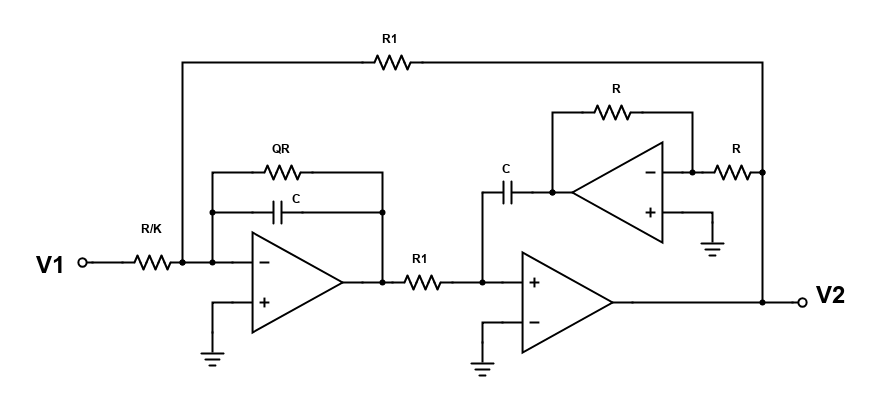

A partir de los valores obtenidos de $~Q = 0,95 ~~y~~ W_{0} = 1.05$, y asumiendo una ganancia unitaria de $K = 1 ~~y~~ R=C=1$, se procede a calcular el valor de los componentes.

$$
QR = 0,95*1 = 0.95
$$

$$
R_{1} = \frac{1}{\omega_{0}C} = \frac{1}{1,05*1} \Rightarrow R_{1} = 0.95
$$

Se simulará el comportamiento del circuito en TINA.

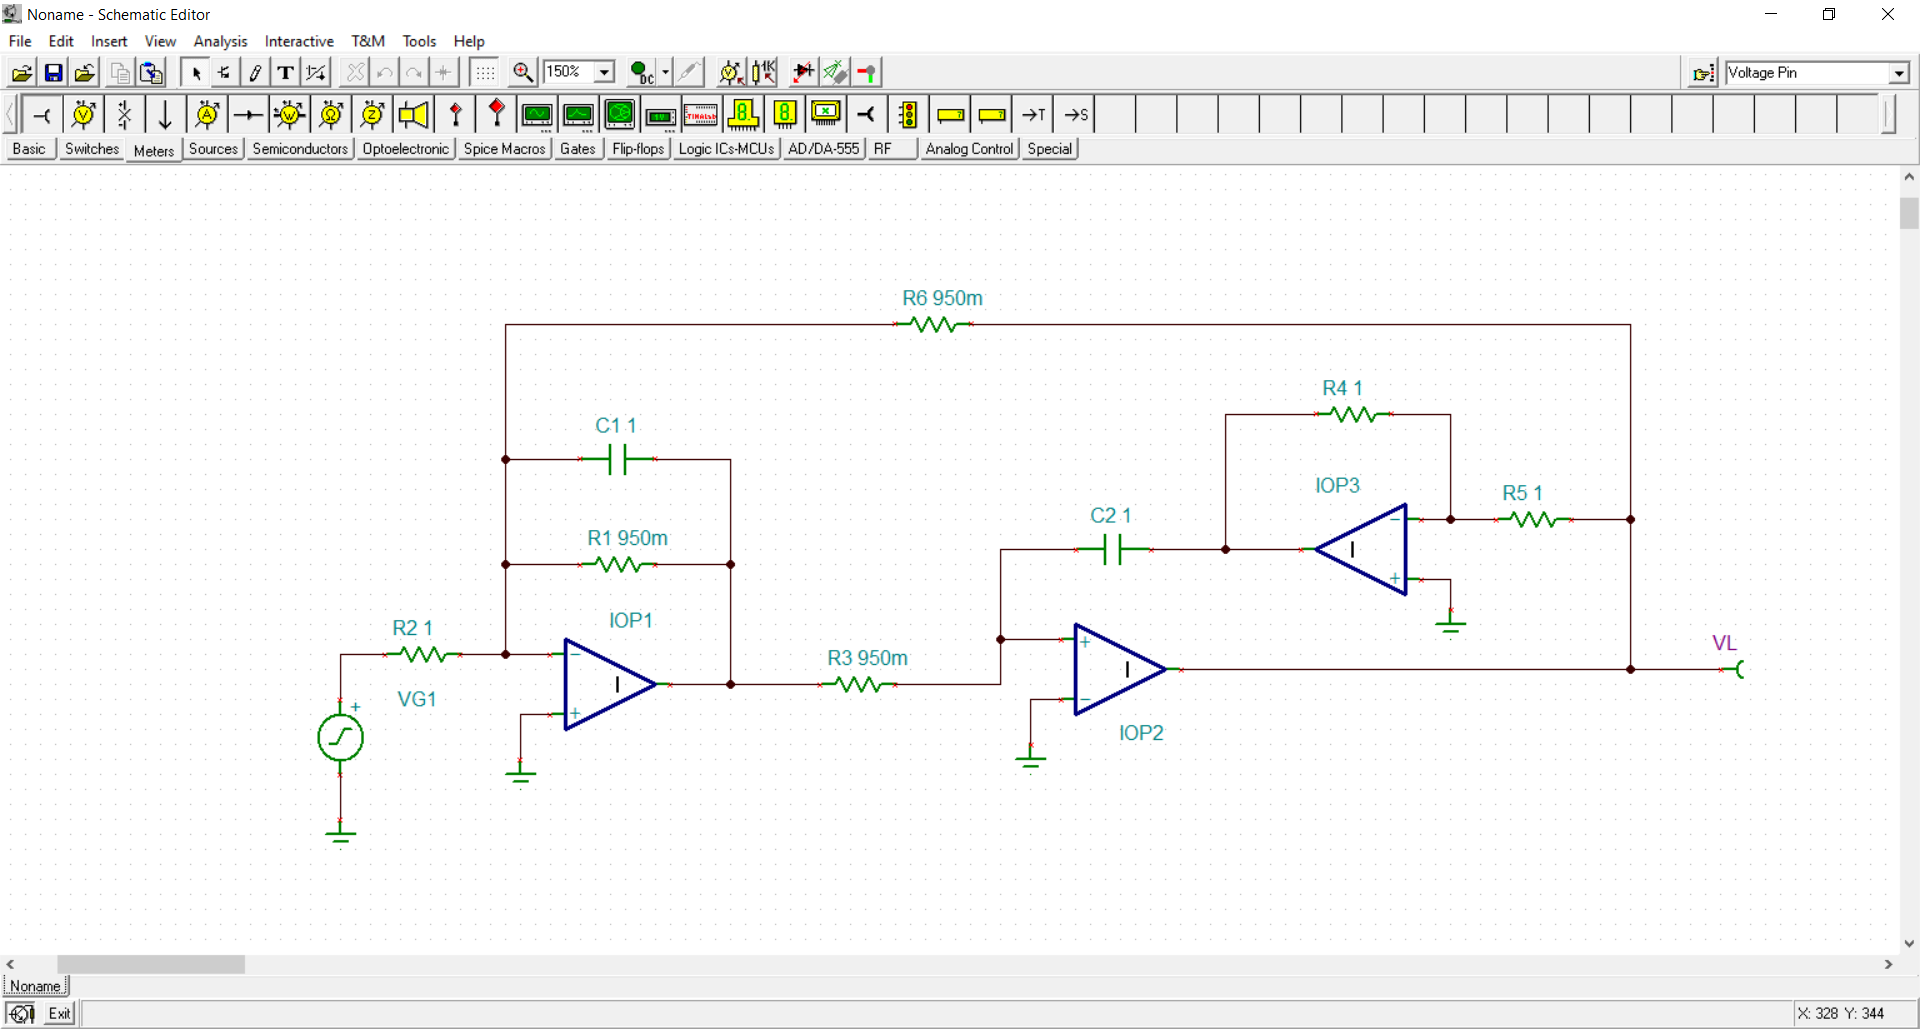

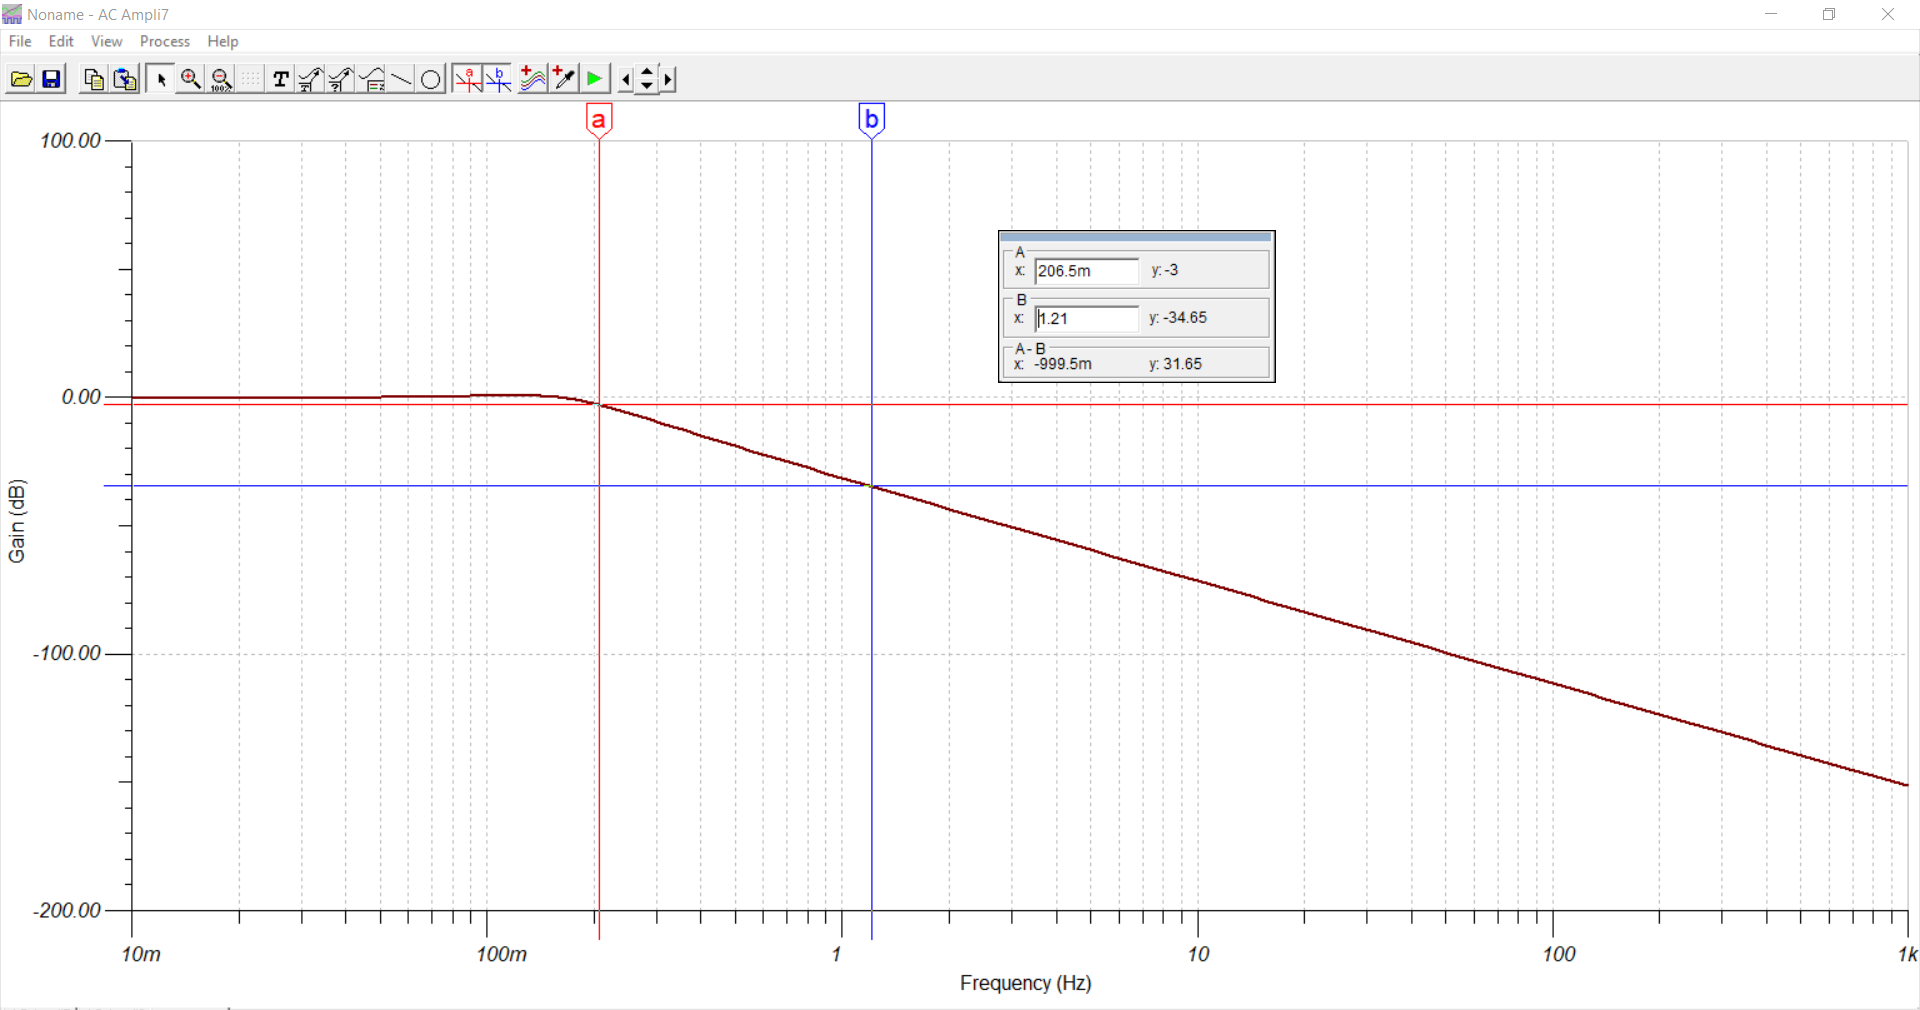

Se observa que laa frecuencia de corte normalizada es cercana a los $159mHz \equiv \Omega_{p}$ y el roll-off del circuito se acerca a los 40db/dec correspondientes a un circuito de orden 2.

Por ultimo, se desnormaliza los componentes:

In [9]:
# Componentes normalizados
C_n  = 1
R_n  = 1
R1_n = 0.95
QR_n = 0.95

# Normas
N_omega = 2 * math.pi * 500     # Norma de frecuencia
N_z = 677.2                     # Norma de impedancia para C=470nF

# Desnormalizacion
C = C_n / (N_omega * N_z)
R  = R_n * N_z
R1 = R1_n * N_z 
QR = QR_n * N_z 

print('C: {}; R: {}; R: {}; QR: {}'.format(C,R,R1,QR))

C: 4.7003822531569803e-07; R: 677.2; R: 643.34; QR: 643.34
